In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [19]:
df = pd.read_csv("../datasets/champion_win_rates_by_role.csv")

print(df)

    champion_name     role  total_matches  wins   win_rate
0          Aatrox   MIDDLE              6     2  33.333333
1          Aatrox      TOP            185    89  48.108108
2            Ahri   MIDDLE            364   192  52.747253
3            Ahri      TOP              4     2  50.000000
4           Akali   BOTTOM              2     0   0.000000
..            ...      ...            ...   ...        ...
462          Zyra   BOTTOM             30    20  66.666667
463          Zyra   JUNGLE            162    82  50.617284
464          Zyra   MIDDLE              3     2  66.666667
465          Zyra      TOP              1     0   0.000000
466          Zyra  UTILITY             19    11  57.894737

[467 rows x 5 columns]


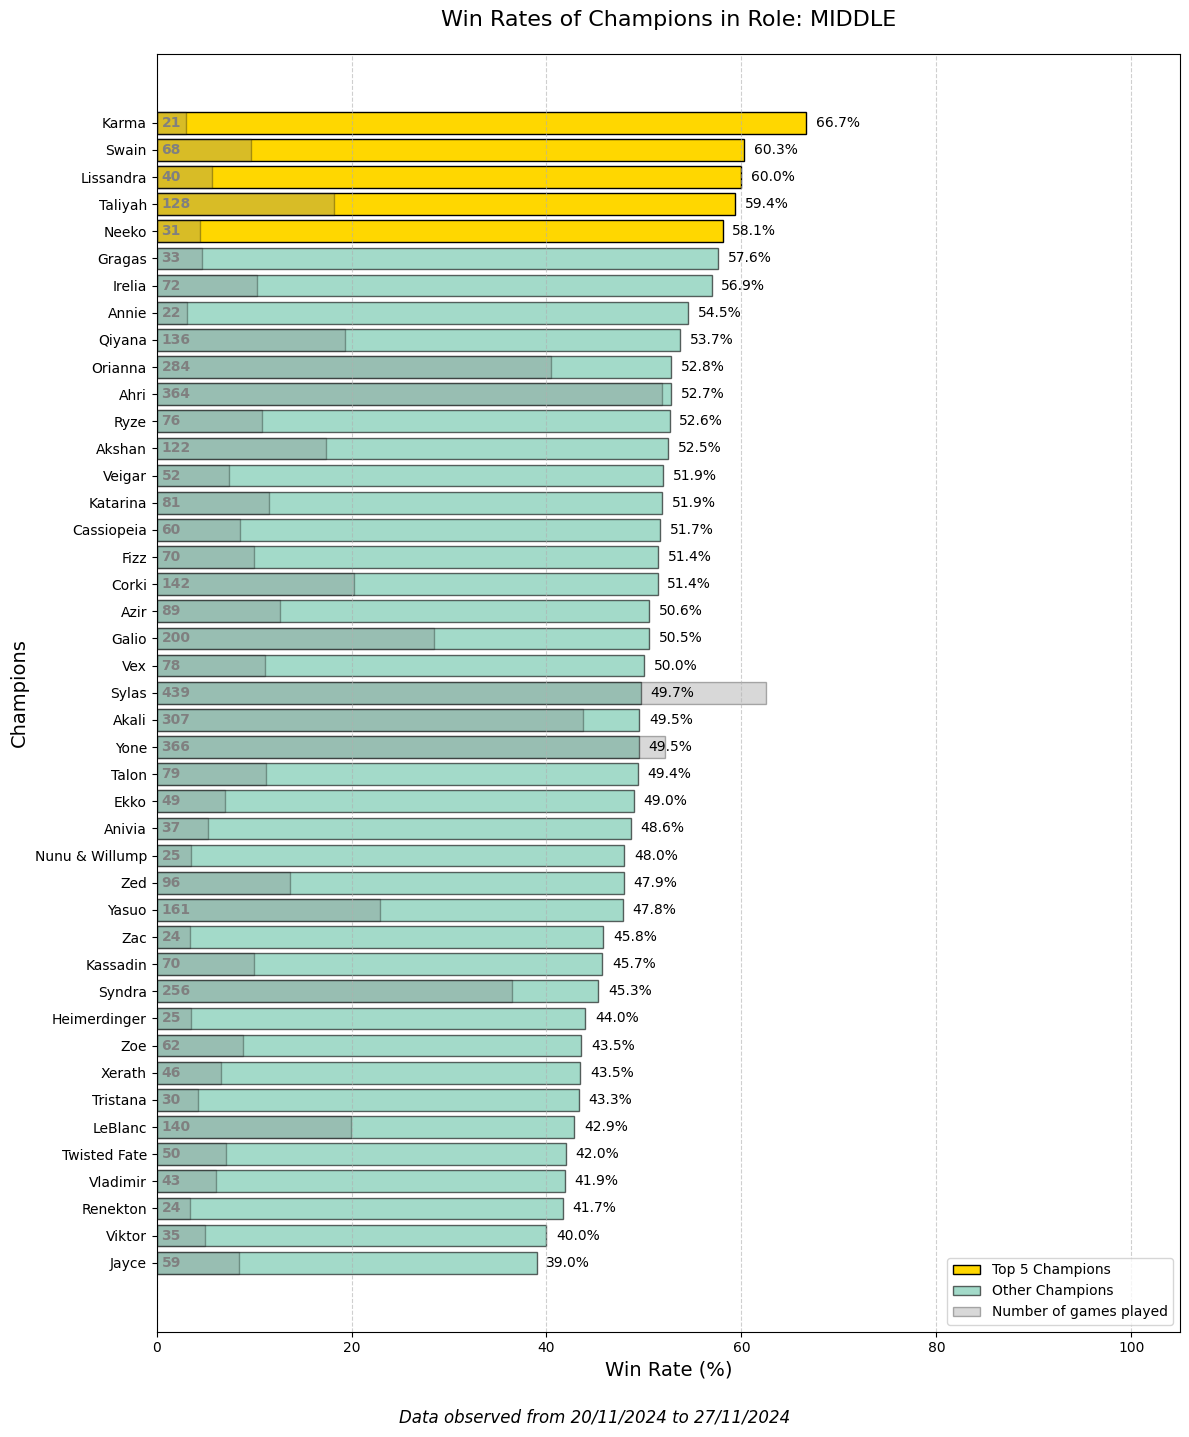

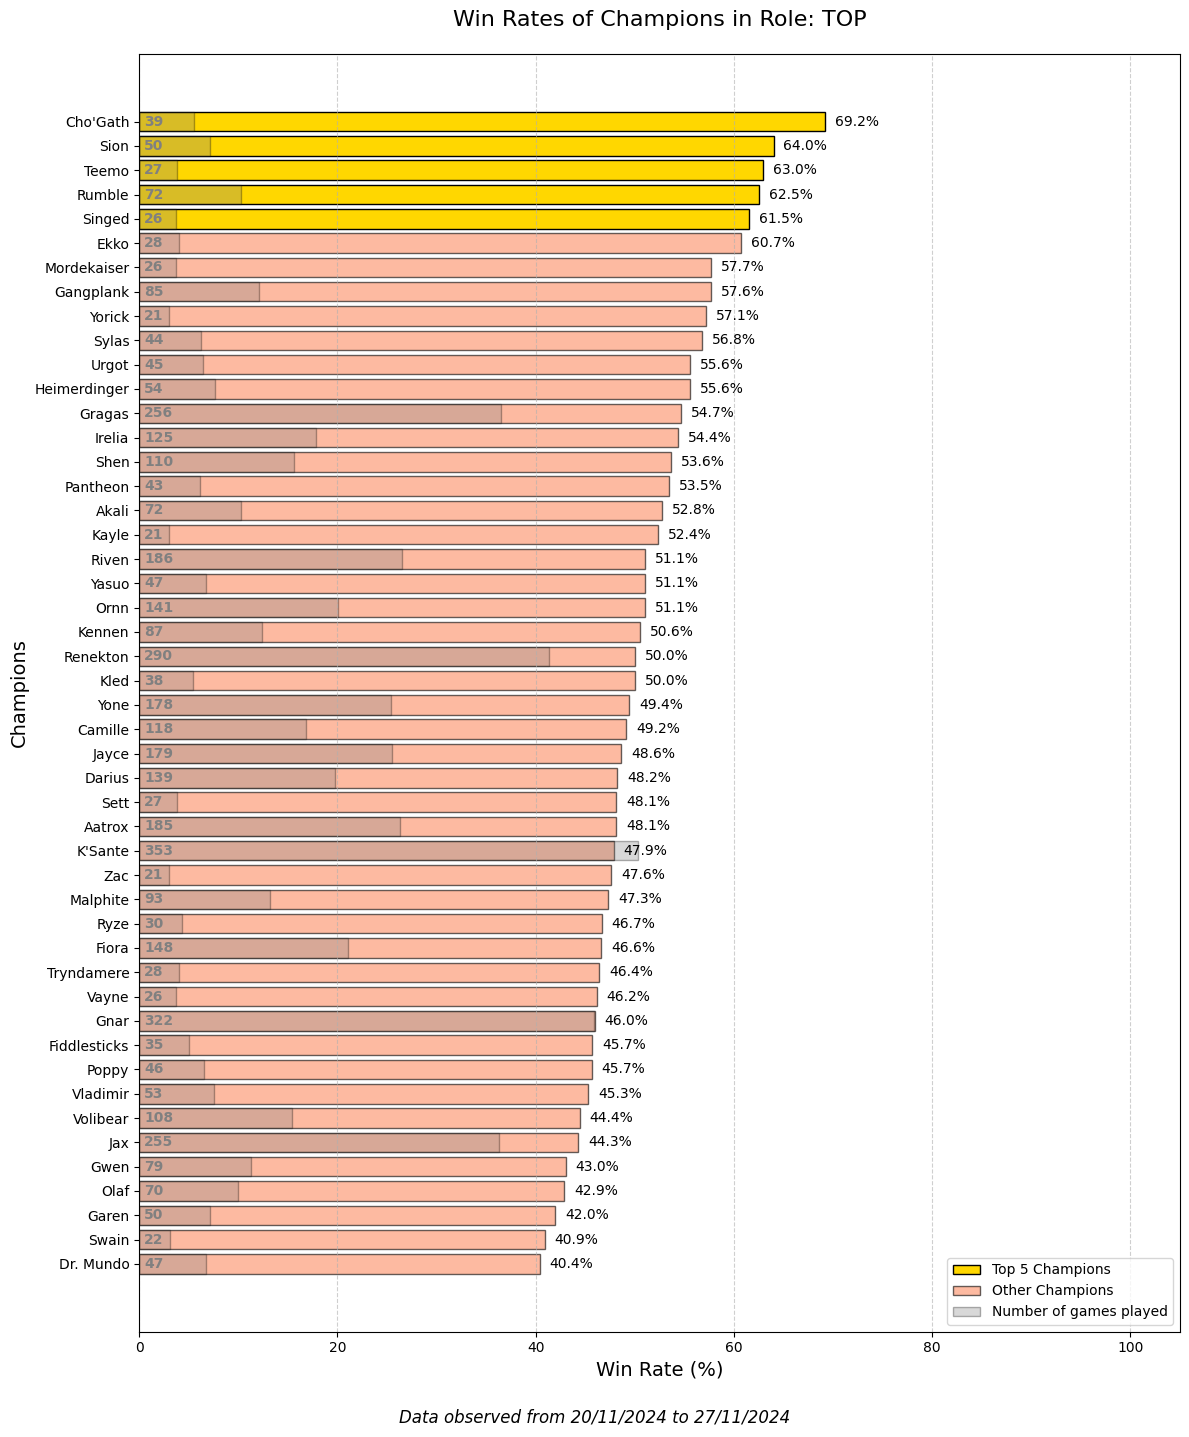

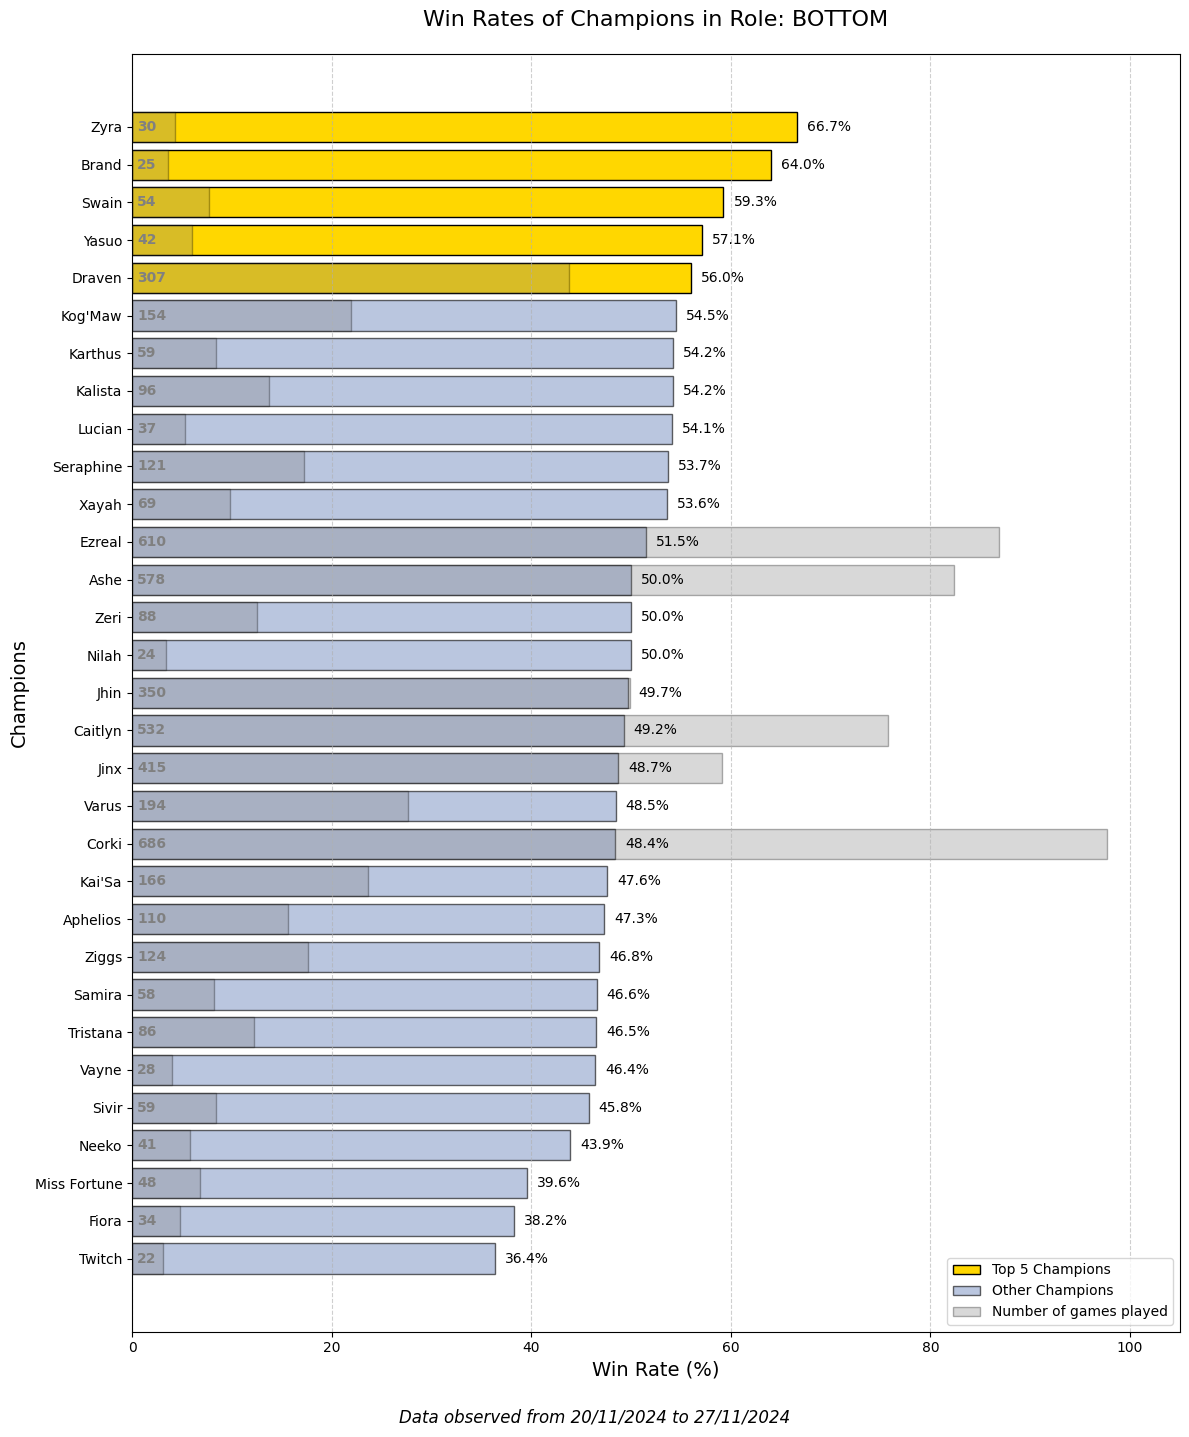

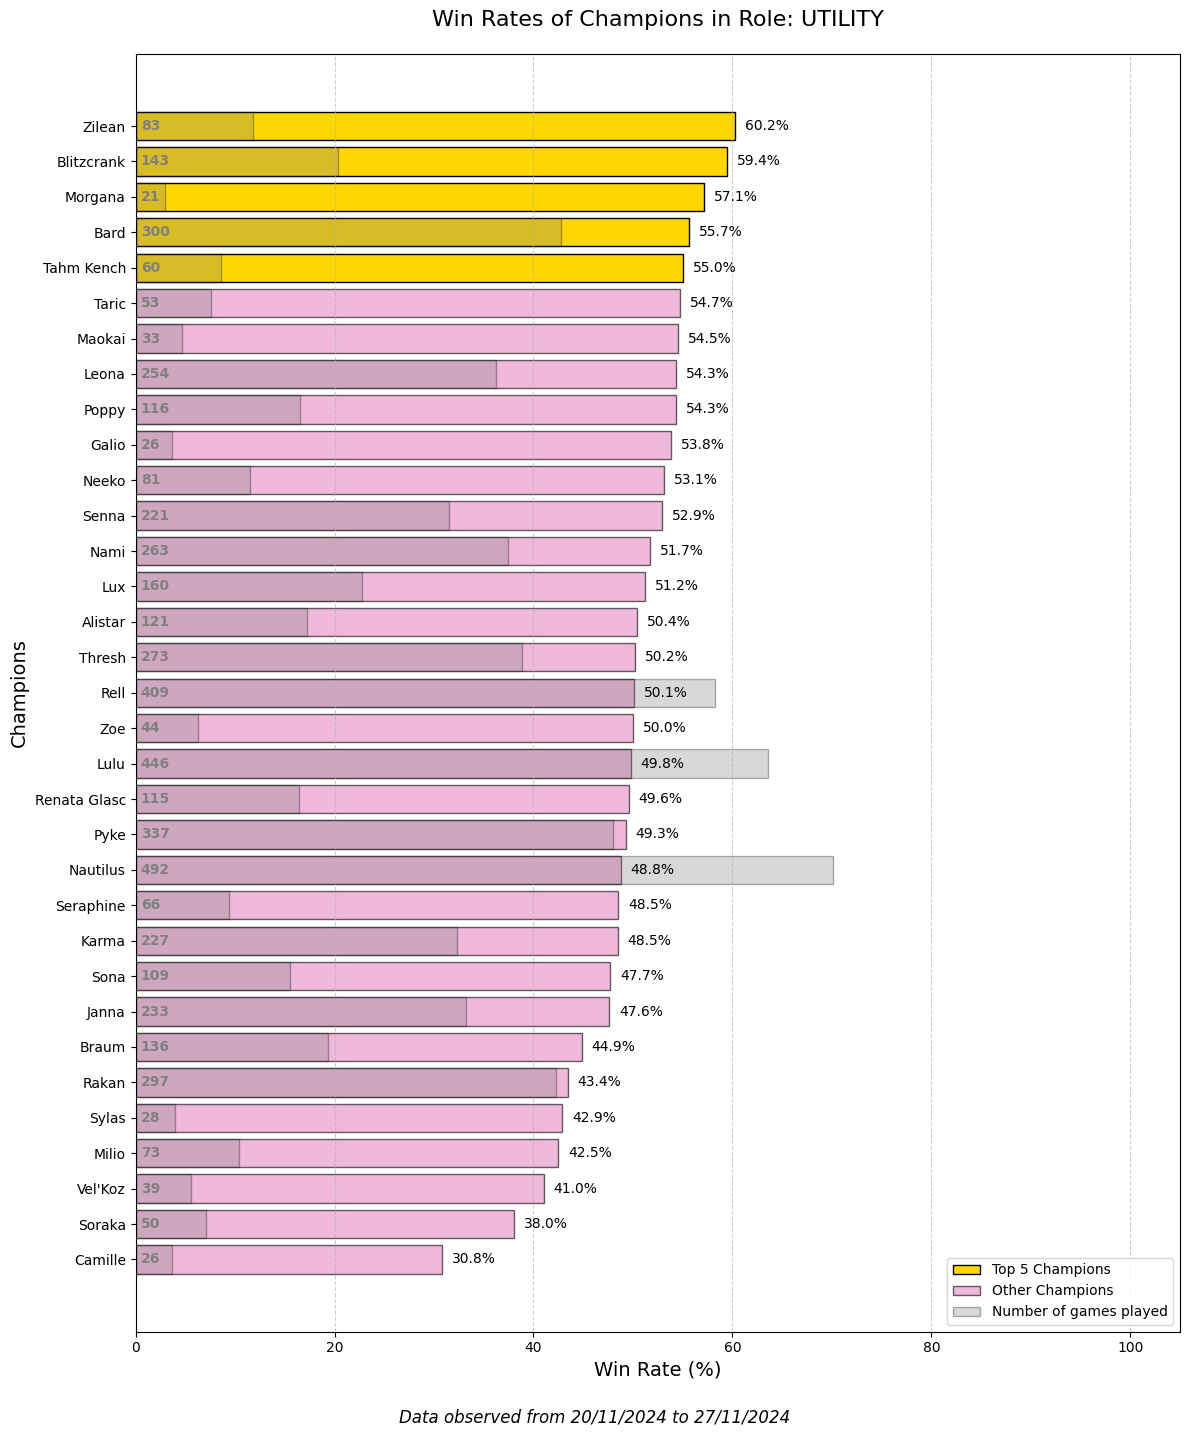

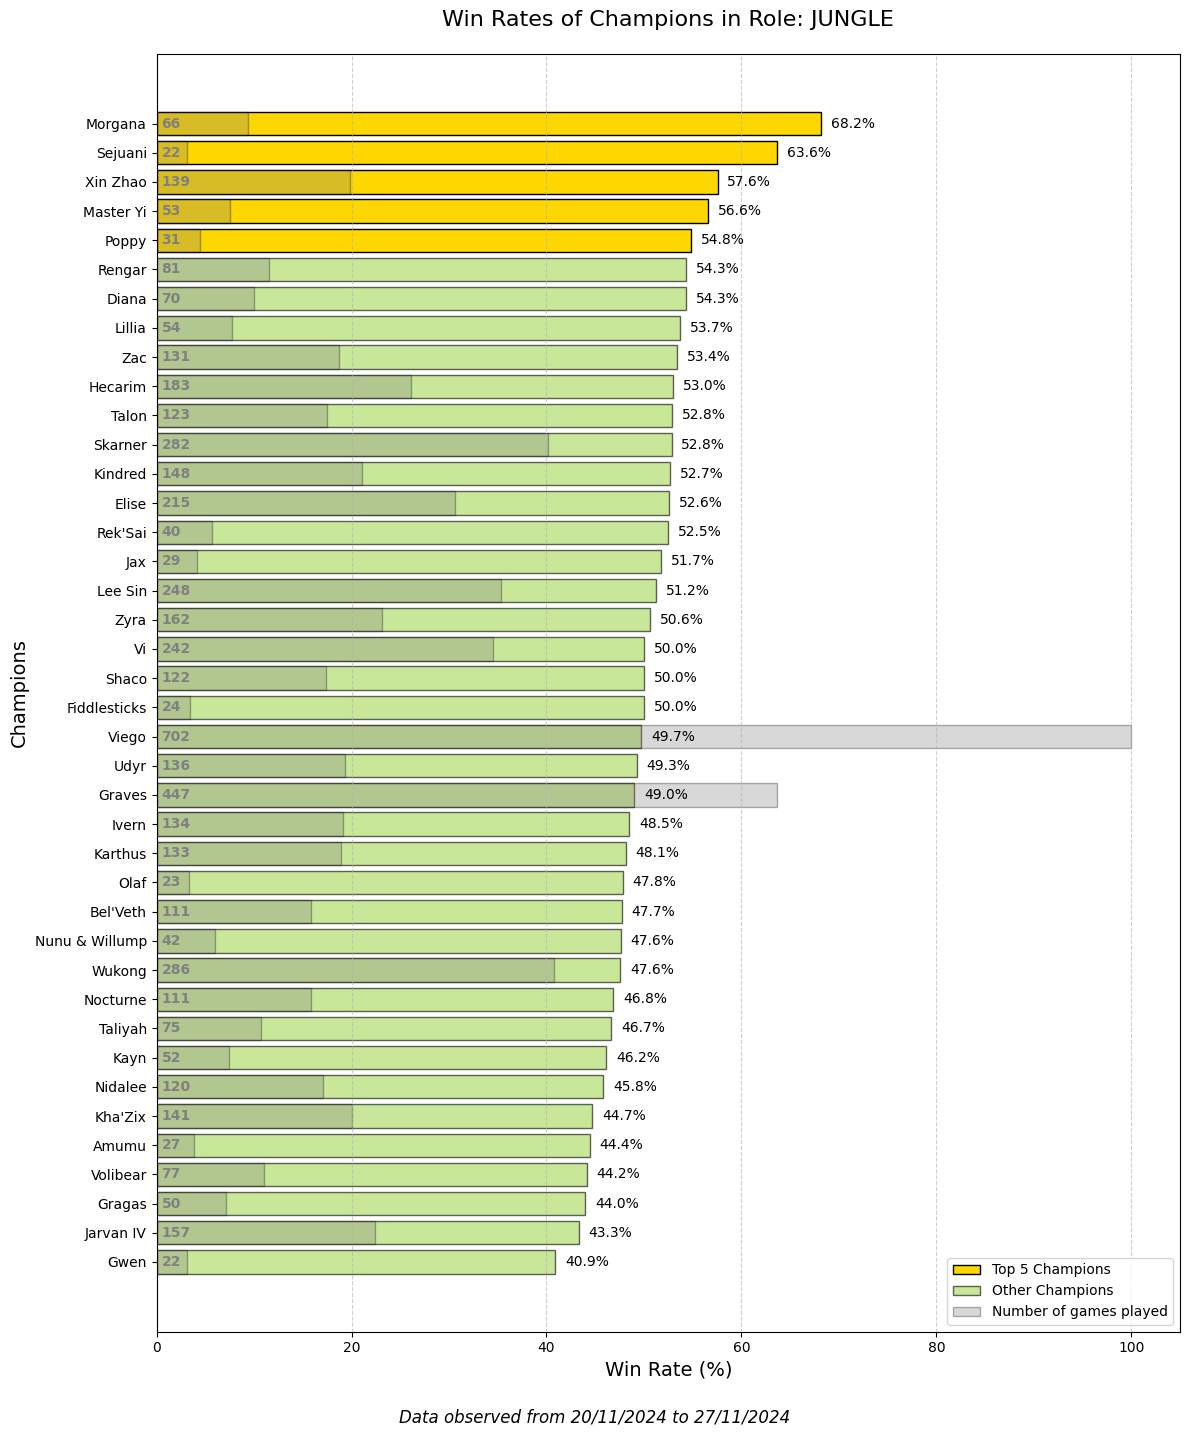

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime, timedelta

# Obtenir la date actuelle (automatique) et convertir au format lisible
actual_date = datetime.fromtimestamp(time.time()).strftime("%d/%m/%Y")

# Calculer la date de début (7 jours avant aujourd'hui)
start_date = (datetime.fromtimestamp(time.time()) - timedelta(days=7)).strftime("%d/%m/%Y")

# Obtenir les rôles uniques
roles = df['role'].unique()

# Palette de couleurs pour différencier les rôles
palette = sns.color_palette("Set2", len(roles))

# Générer un graphique séparé pour chaque rôle
for role, color in zip(roles, palette):
    # Filtrer les données pour le rôle en cours et les champions joués plus de 20 fois
    role_data = df[(df['role'] == role) & (df['total_matches'] > 20)].sort_values(by='win_rate', ascending=False)

    # Si aucun champion ne correspond, passer au rôle suivant
    if role_data.empty:
        continue

    # Identifier le top 5
    top_5 = role_data.iloc[:5]
    others = role_data.iloc[5:]

    # Créer une nouvelle figure pour chaque rôle
    plt.figure(figsize=(12, 14))

    # Tracer les barres pour le top 5 (couleur spéciale)
    bars_top_5 = plt.barh(
        top_5['champion_name'], 
        top_5['win_rate'], 
        color='gold',  # Couleur dorée pour mettre en valeur le top 5
        edgecolor='black',
        label="Top 5 Champions"
    )

    # Tracer les barres pour les autres champions
    bars_others = plt.barh(
        others['champion_name'], 
        others['win_rate'], 
        color=color, 
        alpha=0.6,  # Opacité réduite pour différencier
        edgecolor='black',
        label="Other Champions"
    )

    # Ajouter des barres en filigrane représentant le nombre de parties jouées
    for bar, matches in zip(list(bars_top_5) + list(bars_others), 
                            pd.concat([top_5['total_matches'], others['total_matches']])):
        # Calculer la largeur du barplot en fonction du nombre de parties jouées
        max_matches = df['total_matches'].max()  # Maximum du nombre de parties jouées
        scale_factor = max_matches / 100  # Un facteur pour ajuster l'échelle (ajuster si nécessaire)
        match_bar_width = matches / scale_factor  # Largeur de la barre pour le nombre de parties jouées

        # Tracer le barplot en filigrane (par-dessus les barres de win rate)
        plt.barh(
            bar.get_y()+0.4, 
            match_bar_width, 
            height=bar.get_height(), 
            color='grey',  # Couleur en filigrane
            alpha=0.3,  # Transparence
            edgecolor='black',
            label="Number of games played" if bar == bars_top_5[0] else ""  # Ajouter le label une seule fois
        )

        plt.text(
            0.5,  # Centré horizontalement sur la barre
            bar.get_y() + bar.get_height() / 2,  # Centré verticalement
            f"{matches}",  # Nombre de matchs
            va='center', 
            ha='left', 
            color="grey", 
            fontsize=10, 
            fontweight="bold"
        )
    
    # Ajouter les annotations pour les win rates (à droite des barres)
    for bar, win_rate in zip(list(bars_top_5) + list(bars_others), 
                             pd.concat([top_5['win_rate'], others['win_rate']])):
        plt.text(
            bar.get_width() + 1,  # Position juste après la barre
            bar.get_y() + bar.get_height() / 2,  # Centré verticalement
            f"{win_rate:.1f}%",  # Win rate en pourcentage
            va='center', 
            ha='left', 
            fontsize=10
        )
    
    # Titre et labels
    plt.title(f"Win Rates of Champions in Role: {role}", fontsize=16, pad=20)
    plt.xlabel("Win Rate (%)", fontsize=14)
    plt.ylabel("Champions", fontsize=14)
    plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher les champions avec le plus de victoires en haut
    
    # Ajuster l'axe des x pour avoir une meilleure visibilité
    plt.xlim(0, max(df['win_rate'].max() + 5, 100))  # Limite jusqu'à 100% ou légèrement plus
    
    # Ajouter une grille pour les taux de victoire
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Ajouter une légende
    plt.legend(loc="lower right", fontsize=10)

    # Ajouter un texte indiquant la période
    plt.figtext(
        0.5, -0.02, 
        f"Data observed from {start_date} to {actual_date}", 
        wrap=True, 
        horizontalalignment='center', 
        fontsize=12, 
        fontstyle='italic'
    )

    # Ajuster les espacements
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

